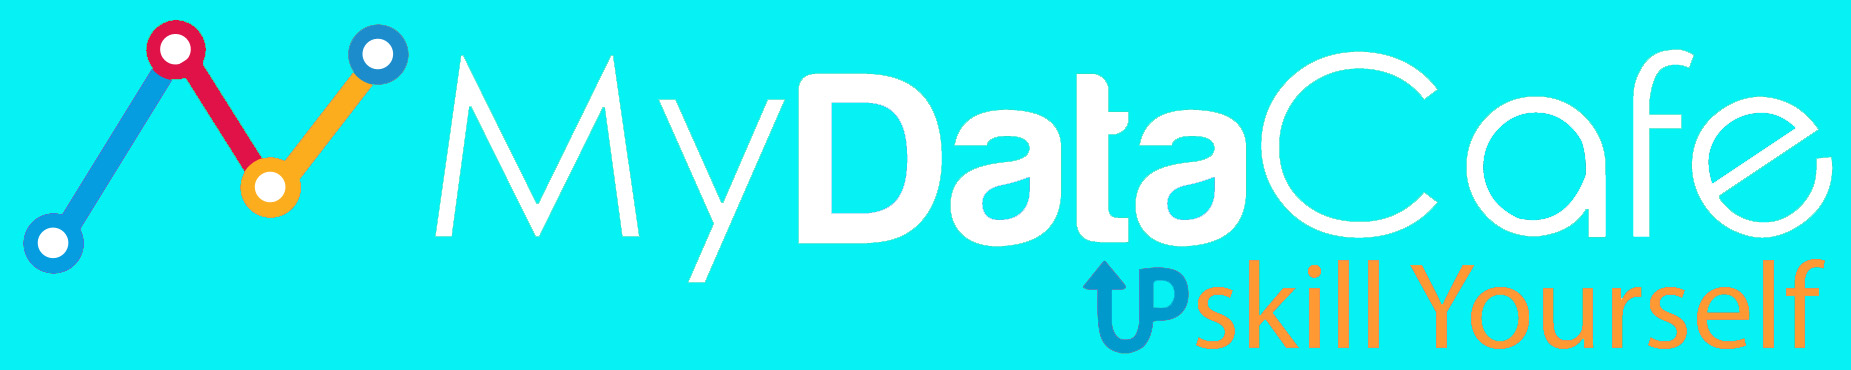

In [1]:
#All codes are available at https://github.com/MyDataCafe/
#All Class Videos are at https://www.youtube.com/mydatacafe
#We are on Facebook https://www.facebook.com/mydatacafe/
#We are on LinkedIn https://www.linkedin.com/company/mydatacafe/

# Data Manipulation in Python

# lambda expressions

In [1]:
f1 = lambda x, y : x + y # to add x and y ( which are passes as inputs)
f2= lambda x:x**3

In [2]:
print (f1(1,5))
f2(4)

6


64

In [3]:
#lambda with map
#multiply each elemnet of this list by 2
alist=[1,2,3]

In [5]:
#way 1
for i in alist:
    print (i*2)

2
4
6


In [6]:
#way 2
[i*2 for i in alist]

[2, 4, 6]

In [7]:
#Lambda way
map(lambda x:x*2, alist) # syntax of map--> map(func,seq)
# seq is a group of items like lists

In [8]:
#filter
#print all even numbers from a list
alist=[1,3,4,5,7,8,9]
filter(lambda x:x%2==0, alist)
#filter keeps only the True values and deletes the False

In [11]:
#convert these fahrenheit to celcius
Celsius = [39.2, 36.5, 37.3, 37.8]
#way 1
print (map(lambda x: (float(9)/5)*x + 32, Celsius) )
print("***")
#way 2
print ([(float(9)/5)*x + 32 for x in Celsius])

***
[102.56, 97.7, 99.14, 100.03999999999999]


In [10]:
#find sum of first 100 natural numbers
import numpy as np
#way 1
print (np.sum(range(101)))
#way2
print (reduce(lambda x,y: x+y, range(101)))

4950
4950


In [11]:
#find the max in a list without using max function
reduce(lambda x,y: x if (x>y)else y, [2,3,4,57,23])

57

In [12]:
text="Python is more popular than R"
text.split()#by default splits by space, u can give any character

['Python', 'is', 'more', 'popular', 'than', 'R']

In [13]:
#can be used to separate #(hastags from social media)
#example
tweet = 'Go Sports! #Sports'
tweet.split("#")[1]

'Sports'

In [14]:
#to check if a item is present in alist
1 in [1,2,333]

True

In [15]:
"abc" in ["swe",2,4,5]

False

# Missing Values

In [13]:
import numpy as np
import pandas as pd

In [14]:
df = pd.DataFrame({'A':[1,2,np.nan],
                  'B':[5,np.nan,np.nan],
                  'C':[1,2,3]})

In [15]:
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3


In [16]:
#to delete all nans
df.dropna()

,A,B,C
0,1.0,5.0,1


In [16]:
#to delete all rows with na
df.dropna(axis=0)

,A,B,C
0,1.0,5.0,1


In [12]:
#to delete all columns with na
df.dropna(axis=1)

,C
0,1
1,2
2,3


In [13]:
df.dropna(thresh=2,axis=0) #delete all rows less than 2 cells filed

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2


In [9]:
print df.fillna(value='FILL VALUE')
print('*********************')
print (df.fillna(value=2))

            A           B  C
0           1           5  1
1           2  FILL VALUE  2
2  FILL VALUE  FILL VALUE  3
*********************
     A    B  C
0  1.0  5.0  1
1  2.0  2.0  2
2  2.0  2.0  3


In [54]:
print (df)
#fill a particular missing value in a column with mean of columns
print('*********************')
df['A'].fillna(value=df['A'].mean(),inplace=True)
print (df)

     A    B  C
0  1.0  5.0  1
1  2.0  NaN  2
2  1.5  NaN  3
*********************
     A    B  C
0  1.0  5.0  1
1  2.0  NaN  2
2  1.5  NaN  3


In [55]:
df_cleaned = df.dropna()#Drop rows where all cells in that row is NA
#df.dropna(axis=1)   #Drop columns where all cells in that col is NA

In [62]:
df['D'] = np.nan #Create a new column full of missing values
print df

     A    B  C   D
0  1.0  5.0  1 NaN
1  2.0  NaN  2 NaN
2  1.5  NaN  3 NaN


In [61]:
# Select the rows of df where Column 1 is not NaN and Column2 is not NaN
#df[df['C1'].notnull() & df['C2'].notnull()]

In [7]:
#count # of nulls
print (df)
df.isnull().sum()#count the nulls in each column

     A    B  C
0  1.0  5.0  1
1  2.0  NaN  2
2  NaN  NaN  3


A    1
B    2
C    0
dtype: int64

In [2]:
#All codes are available at https://github.com/MyDataCafe/
#All Class Videos are at https://www.youtube.com/mydatacafe
#We are on Facebook https://www.facebook.com/mydatacafe/
#We are on LinkedIn https://www.linkedin.com/company/mydatacafe/

In [6]:
np.nan == np.nan#nan is not equal to another nan

False

In [74]:
print df
#When summing data, NA (missing) values will be treated as zero
df.sum()

     A    B  C   D
0  1.0  5.0  1 NaN
1  2.0  NaN  2 NaN
2  1.5  NaN  3 NaN


A    4.5
B    5.0
C    6.0
D    0.0
dtype: float64

# Groupby

In [75]:
#The groupby method allows you to group rows 
#of data together and call aggregate functions

In [18]:
import pandas as pd
# Create dataframe
data = {'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
       'Person':['Sam','Charlie','Amy','Vanessa','Carl','Sarah'],
       'Sales':[200,120,340,124,243,350]}

In [19]:
df=pd.DataFrame(data)
print (df)

  Company   Person  Sales
0    GOOG      Sam    200
1    GOOG  Charlie    120
2    MSFT      Amy    340
3    MSFT  Vanessa    124
4      FB     Carl    243
5      FB    Sarah    350


In [27]:
#find each company's mean sales
df.groupby('Company')['Sales'].mean()
#df.groupby(['Company']).mean() this also works here but will find mean of all 
#possible columns for each company

Company
FB      296.5
GOOG    160.0
MSFT    232.0
Name: Sales, dtype: float64

In [28]:
#lets see what I wrote above
df['newColumn']=[i*2 for i in df['Sales']]

In [29]:
df

,Company,Person,Sales,newColumn
0,GOOG,Sam,200,400
1,GOOG,Charlie,120,240
2,MSFT,Amy,340,680
3,MSFT,Vanessa,124,248
4,FB,Carl,243,486
5,FB,Sarah,350,700


In [31]:
print (df.groupby('Company')['Sales'].mean())
print ('\n')
print (df.groupby('Company').mean())

Company
FB      296.5
GOOG    160.0
MSFT    232.0
Name: Sales, dtype: float64


         Sales  newColumn
Company                  
FB       296.5      593.0
GOOG     160.0      320.0
MSFT     232.0      464.0


In [32]:
#find stardard deviation by company
df.groupby('Company')['Sales'].std()

Company
FB       75.660426
GOOG     56.568542
MSFT    152.735065
Name: Sales, dtype: float64

In [33]:
#find min sales by company
df.groupby('Company')['Sales'].min()

Company
FB      243
GOOG    120
MSFT    124
Name: Sales, dtype: int64

In [34]:
#count # of sales fig present for each comapny
df.groupby('Company')['Sales'].count()

Company
FB      2
GOOG    2
MSFT    2
Name: Sales, dtype: int64

In [20]:
ipl_data = {'Team': ['Riders', 'Riders', 'Devils', 'Devils', 'Kings',
         'kings', 'Kings', 'Kings', 'Riders', 'Royals', 'Royals', 'Riders'],
         'Rank': [1, 2, 2, 3, 3,4 ,1 ,1,2 , 4,1,2],
         'Year': [2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
         'Points':[876,789,863,673,741,812,756,788,694,701,804,690]}

In [21]:
df=pd.DataFrame(ipl_data)
df

,Points,Rank,Team,Year
0,876,1,Riders,2014
1,789,2,Riders,2015
2,863,2,Devils,2014
3,673,3,Devils,2015
4,741,3,Kings,2014
5,812,4,kings,2015
6,756,1,Kings,2016
7,788,1,Kings,2017
8,694,2,Riders,2016
9,701,4,Royals,2014


In [37]:
#Applying multiple functions to columns in groups
print df.groupby('Team')['Rank','Points'].agg([np.mean,np.std])

            Rank                Points            
            mean       std        mean         std
Team                                              
Devils  2.500000  0.707107  768.000000  134.350288
Kings   1.666667  1.154701  761.666667   24.006943
Riders  1.750000  0.500000  762.250000   88.567771
Royals  2.500000  2.121320  752.500000   72.831998
kings   4.000000       NaN  812.000000         NaN


# Merging, Joining, and Concatenating

In [23]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']},
                        index=[0, 1, 2, 3])
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [24]:
df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                        'B': ['B4', 'B5', 'B6', 'B7'],
                        'C': ['C4', 'C5', 'C6', 'C7'],
                        'D': ['D4', 'D5', 'D6', 'D7']},
                         index=[1, 2, 3, 4]) 
df2

,A,B,C,D
1,A4,B4,C4,D4
2,A5,B5,C5,D5
3,A6,B6,C6,D6
4,A7,B7,C7,D7


In [25]:
df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                        'B': ['B8', 'B9', 'B10', 'B11'],
                        'C': ['C8', 'C9', 'C10', 'C11'],
                        'D': ['D8', 'D9', 'D10', 'D11']},
                        index=[1, 2, 3, 4])
df3

,A,B,C,D
1,A8,B8,C8,D8
2,A9,B9,C9,D9
3,A10,B10,C10,D10
4,A11,B11,C11,D11


In [26]:
#pd.concat and pass in a list of DataFrames to concatenate together
print (pd.concat([df1,df2,df3],axis=0)) #axis=0 by default
print('\n')
#the index is repeating, this has to be taken care
print (pd.concat([df1,df2,df3],axis=0,ignore_index=True))

     A    B    C    D
0   A0   B0   C0   D0
1   A1   B1   C1   D1
2   A2   B2   C2   D2
3   A3   B3   C3   D3
1   A4   B4   C4   D4
2   A5   B5   C5   D5
3   A6   B6   C6   D6
4   A7   B7   C7   D7
1   A8   B8   C8   D8
2   A9   B9   C9   D9
3  A10  B10  C10  D10
4  A11  B11  C11  D11


      A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11


In [28]:
#concat columns
pd.concat([df1,df2,df3],axis=1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,A4,B4,C4,D4,A8,B8,C8,D8
2,A2,B2,C2,D2,A5,B5,C5,D5,A9,B9,C9,D9
3,A3,B3,C3,D3,A6,B6,C6,D6,A10,B10,C10,D10
4,NaN,NaN,NaN,NaN,A7,B7,C7,D7,A11,B11,C11,D11


# Merging

In [33]:
A = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K5'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})
   
B= pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K4'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})   

In [34]:
print (A)
print( B)

    A   B key
0  A0  B0  K0
1  A1  B1  K1
2  A2  B2  K2
3  A3  B3  K5
    C   D key
0  C0  D0  K0
1  C1  D1  K1
2  C2  D2  K2
3  C3  D3  K4


In [35]:
pd.merge(A,B,how='inner',on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2


In [38]:
pd.merge(A,B,how='right',on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,NaN,NaN,K4,C3,D3


In [138]:
#merging can be done on multiple columns as well
#pd.merge(left, right, on=['key1', 'key2'])#default join is inner

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1
2,A2,B2,K1,K0,C2,D2


In [135]:
#pd.merge(left, right, how='outer', on=['key1', 'key2'])

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A2,B2,K1,K0,C2,D2
4,A3,B3,K2,K1,NaN,NaN
5,NaN,NaN,K2,K0,C3,D3


In [39]:
print df1
#get unique values in a column
print'\n'
print df1['A'].unique()
#get number of unique values in a column
print df1['A'].nunique()

    A   B   C   D
0  A0  B0  C0  D0
1  A1  B1  C1  D1
2  A2  B2  C2  D2
3  A3  B3  C3  D3


['A0' 'A1' 'A2' 'A3']
4


In [143]:
#equivalent of table function in R
#gives count of each category in a column
#doesnot include the NA
df1['A'].value_counts()

A2    1
A3    1
A0    1
A1    1
Name: A, dtype: int64

In [145]:
#to get nas as well use
from collections import Counter
Counter(df1['A'])

Counter({'A0': 1, 'A1': 1, 'A2': 1, 'A3': 1})

In [41]:
#for 2D viewing use pd.Crosstab()
df.to_csv("ipl.csv",index=False)

# Data Input and Output

In [147]:
#df = pd.read_csv('example.csv') #read a csv file
#df.to_csv('example.csv',index=False) #write a csv file
#pd.read_excel('Excel_Sample.xlsx',sheetname='Sheet1') #read a excel file
#df.to_excel('Excel_Sample.xlsx',sheet_name='Sheet1') #write a excel file

In [ ]:
#install these to read html
#conda install lxml
#conda install html5lib
#conda install BeautifulSoup4

#read_html function will read tables 
#off of a webpage and return a list of DataFrame objects

In [149]:
#df = pd.read_html('http://www.fdic.gov/bank/individual/failed/banklist.html')

In [150]:
#df[0] wil corrospond to the first table

In [ ]:
#All codes are available at https://github.com/MyDataCafe/
#All Class Videos are at https://www.youtube.com/mydatacafe
#We are on Facebook https://www.facebook.com/mydatacafe/
#We are on LinkedIn https://www.linkedin.com/company/mydatacafe/